#                                                       NETFLIX
## Netflix Movie Data Analysis Project



Netflix is known for its work in data science, Al, and ML, particularly for building strong recommendation models and algorithms that understand customer behavior and patterns. Suppose you are working in a data-driven job role, and you have a dataset of more than 9,000 movies. You need to solve the following questions to help the company make informed business decisions accordingly.

1) What is the most frequent genre of movies released on Netflix?

2) What genres has highest votes?

3) What movie got the highest popularity? what's its genre?

4) What movie got the lowest popularity? what's its genre?

5) Which year has the most filmmed movies?

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
df = pd.read_csv('mymoviedb.csv', lineterminator = '\n')

In [105]:
df.head(10)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...
5,2022-01-07,The Commando,An elite DEA agent returns home after a failed...,1750.484,33,6.6,en,"Action, Crime, Thriller",https://image.tmdb.org/t/p/original/pSh8MyYu5C...
6,2022-01-12,Scream,Twenty-five years after a streak of brutal mur...,1675.161,821,6.8,en,"Horror, Mystery, Thriller",https://image.tmdb.org/t/p/original/kZNHR1upJK...
7,2022-02-10,Kimi,A tech worker with agoraphobia discovers recor...,1601.782,206,6.3,en,Thriller,https://image.tmdb.org/t/p/original/okNgwtxIWz...
8,2022-02-17,Fistful of Vengeance,A revenge mission becomes a fight to save the ...,1594.013,114,5.3,en,"Action, Crime, Fantasy",https://image.tmdb.org/t/p/original/3cccEF9QZg...
9,2021-11-03,Eternals,The Eternals are a team of ancient aliens who ...,1537.406,4726,7.2,en,Science Fiction,https://image.tmdb.org/t/p/original/zByhtBvX99...


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [108]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [109]:
#checking for duplicates

df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9822    False
9823    False
9824    False
9825    False
9826    False
Length: 9827, dtype: bool

In [110]:
df.duplicated().sum()

0

In [111]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


# Summary  

### - We have a dataframe consisting of 9827 rows and 9 columns.
### - Our dataset looks a bit tidy with no Nan's nor duplicated values.
### - Release_Date column needs to be casetd into date time for further use.
### - Original language, Overview and poster url wouldn't be useful so, we'll          drop them.
### - There are few noticeable outliers in Popularity column.
### - Statistical values will be useful in future.
### - Genre column has few whitespace which might create problem so that should        be handeled in such case.


In [114]:
# converting Release date data type to date_time

df['Release_Date'] = pd.to_datetime(df['Release_Date'])

print(df['Release_Date'].dtypes)

datetime64[ns]


In [115]:
# As we only need the year we'll convert the release date to year format using dt.year

df['Release_Date'] = df['Release_Date'].dt.year

In [116]:
df.head(1)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...


In [117]:
# Now we'll drop the columns that we dont need for the analysis

cols = ['Overview','Original_Language','Poster_Url']

df=df.drop(cols, axis = 1)

In [118]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


In [119]:
# Now we'll convert(CATEGORIZE IT IN 4 CATEGORIES) the vote_average column into 4 labels so that it becomes easy 
# to classify if movie is POPULAR,AVERAGE,BELOW_AVERAGE,NOT_POPULAR

def categorize_col(df, col, labels):
    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]
    df[col] = pd.cut(df[col],  edges, labels = labels, duplicates = 'drop')
    return df        

In [120]:
labels = ['not_popular','below_avg','average','popular']

categorize_col(df,'Vote_Average', labels)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"
...,...,...,...,...,...,...
9822,1973,Badlands,13.357,896,popular,"Drama, Crime"
9823,2020,Violent Delights,13.356,8,not_popular,Horror
9824,2016,The Offering,13.355,94,not_popular,"Mystery, Thriller, Horror"
9825,2021,The United States vs. Billie Holiday,13.354,152,average,"Music, Drama, History"


In [121]:
# now we'll check what are the unique values present in the vote average column

df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [122]:
# let us check the counts of categories in the Vote average column

df['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64

In [123]:
# Now we'll remove all the nan values from our data frame in case any 

df.isna().sum()

Release_Date      0
Title             0
Popularity        0
Vote_Count        0
Vote_Average    100
Genre             0
dtype: int64

In [124]:
# vote average column has 100 nan values, so we need to remove them 

df.dropna(inplace = True)

In [125]:
# cross checking

df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [126]:
# Now we'll remove the whitespace in the genre column 
# and if there are more than 1 genre in a single row we'll separate them aswell

df['Genre'] = df['Genre'].str.split(', ')

df = df.explode('Genre').reset_index(drop = True)#-------------------


In [127]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [152]:
df.info() # the rows have incresed from 9827 to 25552

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  object  
dtypes: category(1), float64(1), int32(1), int64(1), object(2)
memory usage: 923.6+ KB


In [156]:
# Now we'll cast the genre column into category

df['Genre'] = df['Genre'].astype('category')

df['Genre'].dtypes                                

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [158]:
df['Genre'].unique()

['Action', 'Adventure', 'Science Fiction', 'Crime', 'Mystery', ..., 'Romance', 'Western', 'History', 'TV Movie', 'Documentary']
Length: 19
Categories (19, object): ['Action', 'Adventure', 'Animation', 'Comedy', ..., 'TV Movie', 'Thriller', 'War', 'Western']

In [160]:
df.nunique()

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

In [162]:
# Now we will perform all operations according to the questions that is provided to us 

In [164]:
# We'll do Data visualization along with it aswell

sns.set_style('whitegrid')

# What is the most frequent genre of movies release on NETFLIX?

In [167]:
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

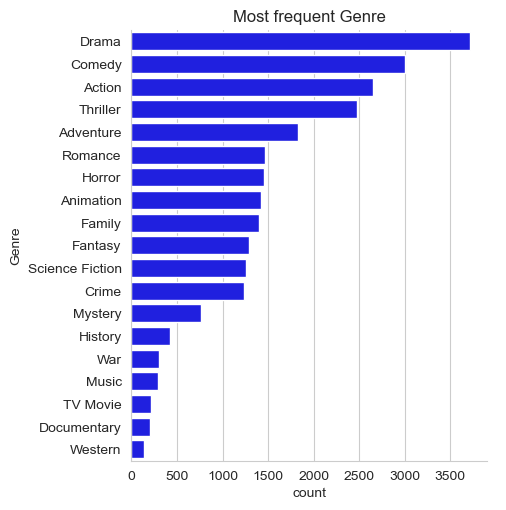

In [169]:
sns.catplot(y = 'Genre', data = df, kind = 'count',
            order = df['Genre'].value_counts().index, color = 'Blue')
plt.title("Most frequent Genre")
plt.show()

# Which has highest votes in vote avg column 

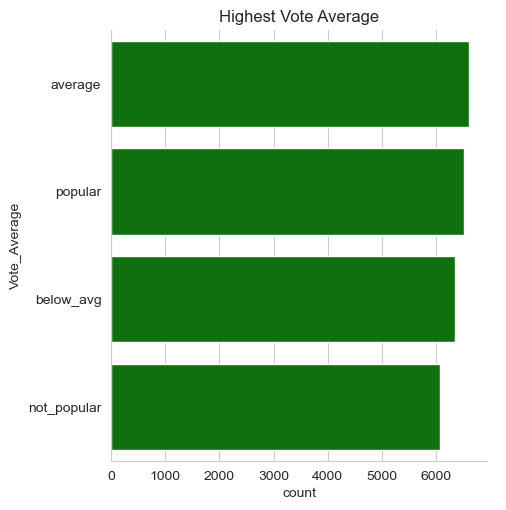

In [172]:
sns.catplot(y = 'Vote_Average', data = df,kind = 'count',
            order = df['Vote_Average'].value_counts().index,
            color = 'Green')
plt.title("Highest Vote Average")

plt.show()

# what movie got the highest popularity? what's its genre?

In [219]:
most_popular = df[df['Popularity'] == df['Popularity'].max()]
print(most_popular)

   Release_Date                    Title  Popularity  Vote_Count Vote_Average  \
0          2021  Spider-Man: No Way Home    5083.954        8940      popular   
1          2021  Spider-Man: No Way Home    5083.954        8940      popular   
2          2021  Spider-Man: No Way Home    5083.954        8940      popular   

             Genre  
0           Action  
1        Adventure  
2  Science Fiction  


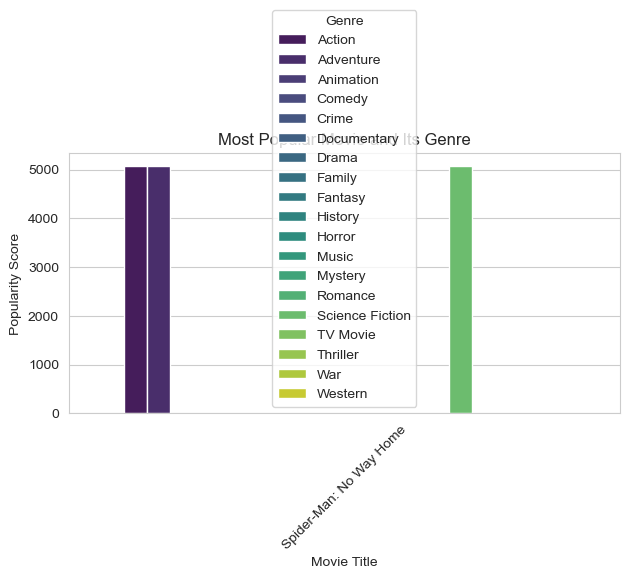

In [221]:
sns.barplot(
    data=most_popular,
    x='Title',
    y='Popularity',
    hue='Genre',
    palette='viridis'
)

plt.title('Most Popular Movie and Its Genre')
plt.xlabel('Movie Title')
plt.ylabel('Popularity Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# what movie got the lowest popularity? what's its genre?

In [223]:
least_popular = df[df['Popularity'] == df['Popularity'].min()]
print(least_popular)

       Release_Date                                 Title  Popularity  \
25546          2021  The United States vs. Billie Holiday      13.354   
25547          2021  The United States vs. Billie Holiday      13.354   
25548          2021  The United States vs. Billie Holiday      13.354   
25549          1984                               Threads      13.354   
25550          1984                               Threads      13.354   
25551          1984                               Threads      13.354   

       Vote_Count Vote_Average            Genre  
25546         152      average            Music  
25547         152      average            Drama  
25548         152      average          History  
25549         186      popular              War  
25550         186      popular            Drama  
25551         186      popular  Science Fiction  


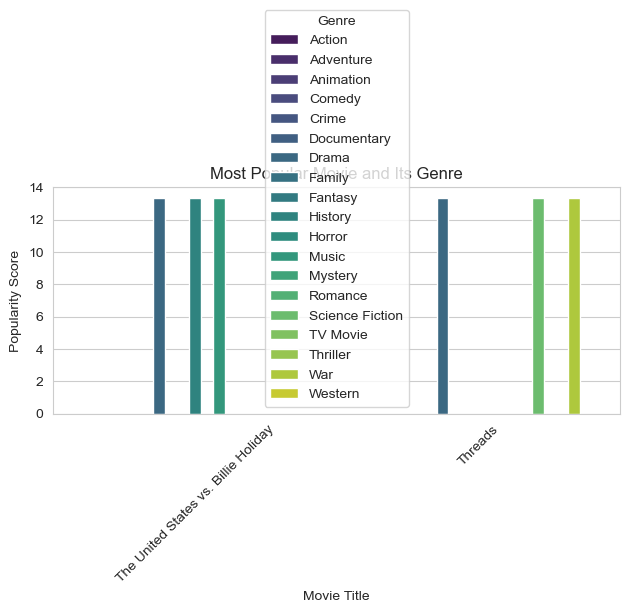

In [225]:
sns.barplot(
    data=least_popular,
    x='Title',
    y='Popularity',
    hue='Genre',
    palette='viridis'
)

plt.title('Most Popular Movie and Its Genre')
plt.xlabel('Movie Title')
plt.ylabel('Popularity Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Which year has the most filmmed movies?

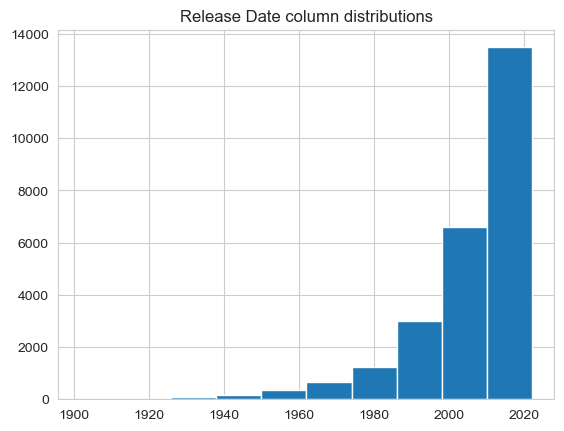

In [203]:
df['Release_Date'].hist()
plt.title("Release Date column distributions")
plt.show()

# Summary

1) What is the most frequent genre of movies released on Netflix?
- Drama genre is the most frequent genre in our dataset and has appeared more than 14 % of the timesd along 19 other genres.


2) What genres has highest votes?
- We have 25.5% of our dataset with popular vote(6520 rows). Drama again gets the highest popularity among fans by being having more than 18.5%
of movies popularity.


3) What movie got the highest popularity? what's its genre?
- Spider-Man: No way home has the highest popularity rate in pur dataset and it has genres of action, adventure amd science fiction.

    
4) What movie got the lowest popularity? what's its genre?
- The united states, thread has the lowest rate in our dataset and they have genres of music, drama, ear, sci-fi and history.


5) Which year has the most filmmed movies?
- Year 2020 has the highest filming rate in our dataset.